# Big market sales

This project will follow the stages:

1. Data Exploration
2. Data Cleaning
3. Feature Engineering
4. Model Building

Data description:

|Variable|                        Description|
|-----------------------|-----------------------------------------------------------------|
|Item_Identifier|                 Unique product ID|
|Item_Weight|                     Weight of product|
|Item_Fat_Content|                Whether the product is low fat or not|
|Item_Visibility|                 The % of total display area of all products in a store allocated to the particular product|
|Item_Type|                       The category to which the product belongs|
|Item_MRP|                        Maximum Retail Price (list price) of the product|
|Outlet_Identifier|               Unique store ID|
|Outlet_Establishment_Year|       The year in which store was established|
|Outlet_Size|                     The size of the store in terms of ground area covered|
|Outlet_Location_Type|            The type of city in which the store is located|
|Outlet_Type|                     Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|               Sales of the product in the particulat store. This is the outcome variable to be predicted|

## 1. Data exploration

First, let's import the data, check the columns data types and some basic statistics.

In [1]:
#Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the .txt files provided by Analytics Vidhya

train = pd.read_csv('Train_UWu5bXk.txt', sep=",")
test = pd.read_csv('Test_u94Q5KV.txt', sep=",")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Checking the test dataframe
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#Checking train and test shapes
train.shape, test.shape

((8523, 12), (5681, 11))

At first it might seem strang that the train set has an extra column, but the extra column is the Item_Outlet_Sales, which is my outcome value, therefore, in the test set, this column will be predicted and filled.

Let's combine both data sets for cleaning and check for NaN values.

In [5]:
#Combine the data sets
data = pd.concat([train, test],ignore_index=True)
print(data.shape)

(14204, 12)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


The concat is correct because 8523 + 5681 = 14204 (new number of lines)

In [6]:
#Check NaN values
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

We can see that there are several missing values in three columns: Outlet_Size, Item_Weight, Item_Outlet_Sales.

There is important to notice that the missing values of Item_Outlet_Sales are the ones from the test set, so we only need to worry about the first two columns.

In [7]:
#Let's check some basic descriptive statistics (let's check all columns)
data.describe(include='all')

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4
top,Low Fat,NCI06,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN


The data market as NaN are not numerical values, so the statics don't apply.

In [8]:
#Let's check just the numerical values
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [9]:
#Let's check the data types of the columns
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
dtype: object

It is possible to check if there is a relationship between the float and int variables using the scatter plot.
Amoung the four variables market as float64, an interesting result can come from item visibility and item outlet sales. A relationship among this two variables might provide insides regarding the amount of space a product occupy in a store and it's 

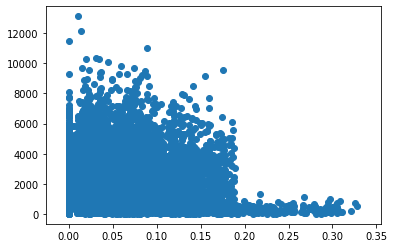

In [10]:
#Considering the columns Item_Outlet_Sales and Item_Visibility
graph1 = plt.scatter(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = data)

Considering just item visibility, we have an odd result. Items with less visibility have a high variability on the total sales and can reach high values while items with high visibility have low variability and low sales. This results might indicate that a model considering item visibility might have heteroscedasticity (the variability of a variable is unequal across the range of y) if we performe a linear regression.

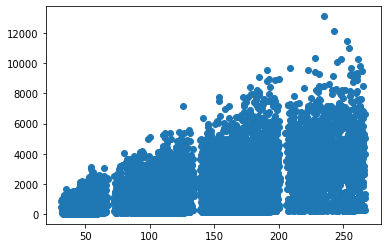

In [11]:
#Considering the columns Item_Outlet_Sales and Item_MRP
graph1 = plt.scatter(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data)

Similar to the previous case, we also have heteroscedasticity if we consider the maximum retail price of a product, because products with lower maximum price have sales between 0 to 2.000 items, while item with maximum price around 250 haves sales between 0 and over 12.000 units.

Therefore, the scater plots already gave some insights about one of the potential problems that we might have on predicting the expected sales. 

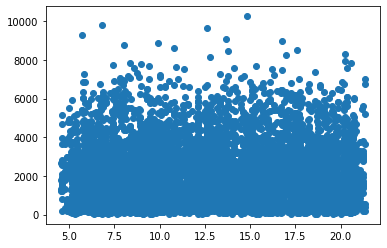

In [12]:
#Considering the columns Item_Outlet_Sales and Item_Weight
graph1 = plt.scatter(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = data)

Product weight, on the other hand, doens't show signs of heteroscedasticity, but if this variable is used in a multiple linear regression with the other ones, we would still need to treat the model for heteroscedasticity.

For the year and sales, let's use the a bar graph for average sales based on the stores age.

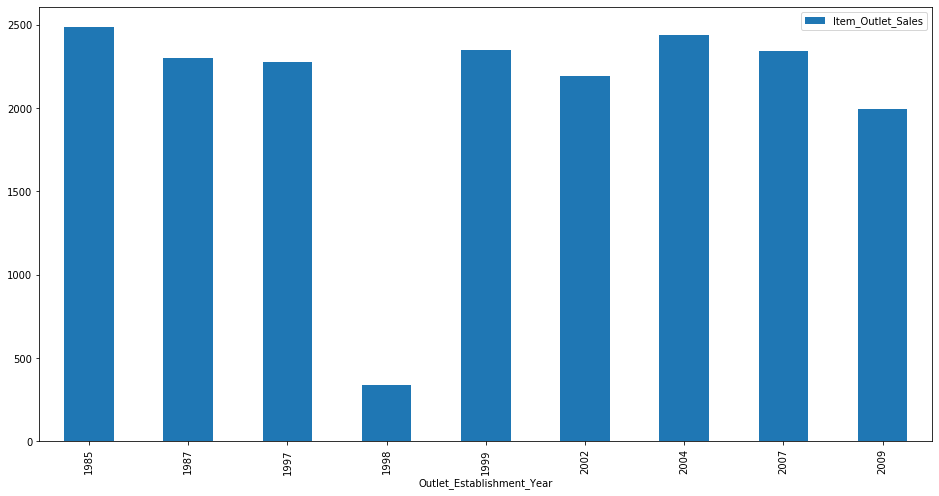

In [13]:
table = data[['Outlet_Establishment_Year','Item_Outlet_Sales']]
table = table.groupby('Outlet_Establishment_Year').mean()
table.plot(kind="bar", figsize=(16,8), stacked=True)

Although it would be expected that older stores would sell more (due to customer loyalty, for example), that doesn't seem to be the case. Thefore, it this variable is used in a linear regression, it's beta might be not statistically significant)

Let's look to the categorical variables. Lets check the items and outlet variables separately. 

Let's start with the items' variables (Item_Fat_Content, Item_Identifier and Item_Type). Since the item identifier is unique for a product it will not bring much information at this point, so let's use check the other two variables.
A good way to first analyze the relation between two categorical variables is the two-way table.

In [14]:
#Two-way table between Item_Fat_Content, Item_Type
table = pd.crosstab(index=data["Item_Type"], columns=data["Item_Fat_Content"])
table

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Item_Type,,,,,
Baking Goods,27,504,522,11,22
Breads,17,198,189,7,5
Breakfast,3,63,118,0,2
Canned,30,503,507,16,28
Dairy,39,636,431,16,14
Frozen Foods,41,681,668,9,27
Fruits and Vegetables,66,1001,895,19,32
Hard Drinks,12,338,0,12,0
Health and Hygiene,49,794,0,15,0


Let's use the stacked bar graph to make the analysis simples.

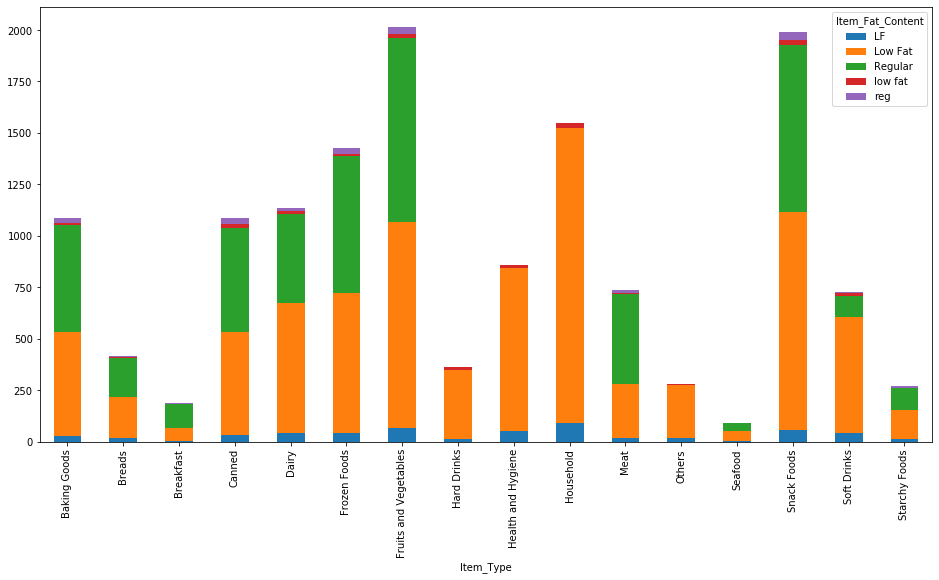

In [15]:
table.plot(kind="bar", figsize=(16,8), stacked=True)

Looking at the legend of the graph we see a problem with this data set. We have different codes corresponding to low fat (LF, Low Fat and low fat) and two codes for regular (reg and Regular). Before using this variable in the model we need to reset the codes (data cleaning).

Let's check the variables from the outlet (Outlet_Identifier, Outlet_Location_Type, Outlet_Size, Outlet_Type ).

In [16]:
#Two-way table between Outlet_Location_Type, Outlet_Size
table = pd.crosstab(index=data["Outlet_Location_Type"], columns=data["Outlet_Size"])
table

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,1550,2430
Tier 2,0,0,1550
Tier 3,1553,3105,0


We can see that Tier 3 has medium to large outlet, while Tier 1 has small and medium and Tier 2 has just small. Considering this data, it is likely that stores in Tier 3 sale more than the others.

In [17]:
#Two-way table between Outlet_Location_Type, Outlet_Type
table = pd.crosstab(index=data["Outlet_Location_Type"], columns=data["Outlet_Type"])
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,880,3100,0,0
Tier 2,0,4641,0,0
Tier 3,925,1553,1546,1559


Again we see that Tier 3 has several types of supermarket while the other ones are more focus on suppermarket type 1 and grocery stores, another indicator that Tier 3 might have larger sales than Tier 1 and 2.

In [18]:
#Two-way table between Outlet_Size, Outlet_Type
table = pd.crosstab(index=data["Outlet_Size"], columns=data["Outlet_Type"])
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


When we compare the types of market with their size, we find that all supermarkets type 2 and 3 are medium, type 1 varies its size and groceries are always small. Considering the previous tables, again we have indicators that Tier 3 region tends to sell more due the size of the stores.

The analysis performed so far are just exploratory. They give the first insights about what we can expect from the data and some potential problems, such as heteroscedasticity and multiple category's names for the same information. 

# 2. Data cleaning

First, we already know that item fat content has more than one value for the same information, so we should review the values and set the appropriate ones.

In [19]:
#retrieving the unique values in the columns Item_Fat_Content
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

We can see that "Low Fat" content has three categories for the same information (LF, Low Fat, low fat) and regular has two (reg and Regular) so we will replace all the "Low Fat" categories for "LF" and the regular for "Regular".

In [20]:
data['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF', inplace=True)
data['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
data['Item_Fat_Content'].unique()

array(['LF', 'Regular'], dtype=object)

Now all the products are either LF (low fat) or Regular.

To be sure we only had this problem with Item_Fat_Content we should check the other categorical variables (Item_Type, Outlet_Identifier, Outlet_Location_Type, Outlet_Size, Outlet_Type).

In [21]:
#retrieving the unique values in the columns Item_Type
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [22]:
#retrieving the unique values in the columns Outlet_Identifier
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [23]:
#retrieving the unique values in the columns Outlet_Location_Type
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [24]:
#retrieving the unique values in the columns Outlet_Size
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

The nan values were expected due the missing values. The missing values will be treated in the next step of the data cleaning.

In [25]:
#retrieving the unique values in the columns Outlet_Type
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

apparently, only the item fat content had problems with it categories.  

Now, we have to treat the missing values in the columns Outlet_Size and Item_Weight (Item_Outlet_Sales is the variable we want to predict, so it is expected the missing values from the test set).

Since we have one categorical variable and one continuous, we can use the mode for the first and the average for the second.

In [26]:
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)
data['Outlet_Size'].fillna((data['Outlet_Size'].mode()[0]), inplace=True)

Now we should check the operation verifying if we still have any missing values.

In [27]:
#Check NaN values
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

Now oly the values we need to predict are missing.

In [28]:
data['Unique product ID'].unique()

KeyError: 'Unique product ID'